In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 


## ALL MODELS FOR ONTARIO WIDE DATA 

In [3]:
df = pd.read_csv('model_data/plotdata.csv',index_col=0,parse_dates=True)

In [4]:
df

,Accurate_Episode_Date,mapped_region,CovidCount,Outcome1,long,lat,ICU,ICU_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,icu_former_covid,icu_former_covid_vented
0,2020-01-01,Central,3,0.0,-79.588842,43.621334,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-01,West,1,0.0,-81.637045,43.169318,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-09,Central,1,0.0,-79.588842,43.621334,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-10,Central,1,0.0,-79.588842,43.621334,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-13,Central,1,0.0,-79.588842,43.621334,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114,2021-05-01,Toronto,624,0.0,-79.379358,43.656591,157.0,105.0,354.0,180.0,123.0,23.0,18.0
2115,2021-05-01,West,46,0.0,-81.637045,43.169318,261.0,202.0,561.0,279.0,207.0,18.0,5.0
2116,2021-05-02,East,1,0.0,-76.207778,44.871030,190.0,139.0,457.0,207.0,147.0,17.0,8.0
2117,2021-05-02,Toronto,12,0.0,-79.379358,43.656591,156.0,105.0,337.0,180.0,120.0,24.0,15.0


In [15]:
df1 = df.groupby(['Accurate_Episode_Date']).sum().reset_index()

In [18]:
df1 = df1.drop(['long','lat','ICU','ICU_vented','icu_former_covid','icu_former_covid_vented'],axis=1)
df1

,Accurate_Episode_Date,CovidCount,Outcome1,hospitalizations,icu_crci_total,icu_crci_total_vented
0,2020-01-01,4,0.0,0.0,0.0,0.0
1,2020-01-09,1,0.0,0.0,0.0,0.0
2,2020-01-10,1,0.0,0.0,0.0,0.0
3,2020-01-13,1,0.0,0.0,0.0,0.0
4,2020-01-16,1,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
455,2021-04-28,2248,0.0,2281.0,877.0,605.0
456,2021-04-29,1998,1.0,2248.0,884.0,620.0
457,2021-04-30,2144,0.0,2201.0,883.0,632.0
458,2021-05-01,1372,0.0,2152.0,900.0,637.0


In [6]:
df2 = pd.read_csv('Vaccinationdata.csv',index_col=0,parse_dates=True)

In [8]:
df2['report_date']=df2['report_date'].str.split('T',expand=True)[0]

In [22]:
df2=df2.drop(['total_doses_in_fully_vaccinated_individuals','_id','previous_day_doses_administered'],axis=1)

In [23]:
df2['total_individuals_fully_vaccinated']= df2['total_individuals_fully_vaccinated'].replace(np.nan,0)

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 125
Data columns (total 3 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   report_date                         126 non-null    object 
 1   total_doses_administered            126 non-null    int64  
 2   total_individuals_fully_vaccinated  126 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.9+ KB


In [42]:
df = df1.merge(df2,left_on='Accurate_Episode_Date', right_on='report_date', how='inner')

In [43]:
df #Full data with daily vaccination 

,Accurate_Episode_Date,CovidCount,Outcome1,hospitalizations,icu_crci_total,icu_crci_total_vented,report_date,total_doses_administered,total_individuals_fully_vaccinated
0,2020-12-24,2725,38.0,967.0,297.0,188.0,2020-12-24,10756,0.0
1,2020-12-30,3137,58.0,1230.0,342.0,212.0,2020-12-30,18603,0.0
2,2020-12-31,3242,51.0,1270.0,354.0,219.0,2020-12-31,23502,0.0
3,2021-01-01,3116,57.0,1269.0,355.0,232.0,2021-01-01,28887,0.0
4,2021-01-02,3208,55.0,1287.0,344.0,230.0,2021-01-02,33191,0.0
...,...,...,...,...,...,...,...,...,...
120,2021-04-28,2248,0.0,2281.0,877.0,605.0,2021-04-28,4907203,365166.0
121,2021-04-29,1998,1.0,2248.0,884.0,620.0,2021-04-29,5027770,368403.0
122,2021-04-30,2144,0.0,2201.0,883.0,632.0,2021-04-30,5139984,371110.0
123,2021-05-01,1372,0.0,2152.0,900.0,637.0,2021-05-01,5247684,373559.0


In [44]:
df['total_doses_administered']= df['total_doses_administered'] - df['total_doses_administered'].shift(1,fill_value=0) 
#Calculating daily change number of adminstered doses 

In [45]:
df['total_individuals_fully_vaccinated']= df['total_individuals_fully_vaccinated'] - df['total_individuals_fully_vaccinated'].shift(1,fill_value=0)
# Calculating daily change in number of people fully vaccinated 

In [46]:
df = df.drop(['Accurate_Episode_Date'],axis=1)

In [47]:
df['report_date'] =pd.to_datetime(df['report_date'])

In [48]:
df.columns

Index(['CovidCount', 'Outcome1', 'hospitalizations', 'icu_crci_total',
       'icu_crci_total_vented', 'report_date', 'total_doses_administered',
       'total_individuals_fully_vaccinated'],
      dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 124
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   CovidCount                          125 non-null    int64         
 1   Outcome1                            125 non-null    float64       
 2   hospitalizations                    125 non-null    float64       
 3   icu_crci_total                      125 non-null    float64       
 4   icu_crci_total_vented               125 non-null    float64       
 5   report_date                         125 non-null    datetime64[ns]
 6   total_doses_administered            125 non-null    int64         
 7   total_individuals_fully_vaccinated  125 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 8.8 KB


In [51]:
df=df.set_index('report_date')


In [52]:
df.head()

,CovidCount,Outcome1,hospitalizations,icu_crci_total,icu_crci_total_vented,total_doses_administered,total_individuals_fully_vaccinated
report_date,,,,,,,
2020-12-24,2725,38.0,967.0,297.0,188.0,10756,0.0
2020-12-30,3137,58.0,1230.0,342.0,212.0,7847,0.0
2020-12-31,3242,51.0,1270.0,354.0,219.0,4899,0.0
2021-01-01,3116,57.0,1269.0,355.0,232.0,5385,0.0
2021-01-02,3208,55.0,1287.0,344.0,230.0,4304,0.0


In [53]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [54]:
df.corr()

,CovidCount,Outcome1,hospitalizations,icu_crci_total,icu_crci_total_vented,total_doses_administered,total_individuals_fully_vaccinated
CovidCount,1.000000,0.315401,0.561109,0.475116,0.395567,0.557330,-0.515501
Outcome1,0.315401,1.000000,0.091116,-0.293776,-0.282563,-0.437894,-0.318235
hospitalizations,0.561109,0.091116,1.000000,0.891196,0.909946,0.532687,-0.280381
icu_crci_total,0.475116,-0.293776,0.891196,1.000000,0.985466,0.774339,-0.210658
icu_crci_total_vented,0.395567,-0.282563,0.909946,0.985466,1.000000,0.699203,-0.143827
total_doses_administered,0.557330,-0.437894,0.532687,0.774339,0.699203,1.000000,-0.254697
total_individuals_fully_vaccinated,-0.515501,-0.318235,-0.280381,-0.210658,-0.143827,-0.254697,1.000000


In [55]:
matrix = np.triu(df.corr())

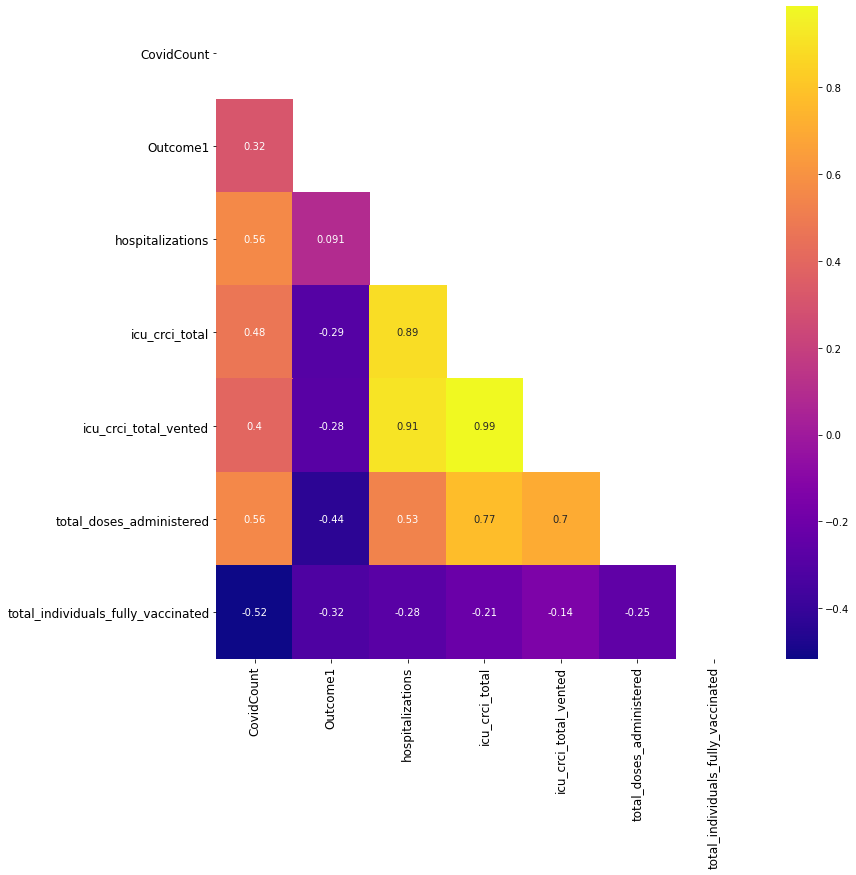

In [62]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),mask=matrix,cmap='plasma',annot=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('model_data/correlation.png')
plt.show()

In [57]:
# plt.figure(figsize=(12,8))
# sns.heatmap(df2.corr(),mask=np.triu(df2.corr()),cmap='plasma',annot=True)
# plt.show()

In [63]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data,variables, test='ssr_chi2test', verbose=False):    
    """
    To check that coefficients of past values influences the present value
    
    Null hypothesis: The coefficients of past values in the times series are equal to zero 
    

   Response variableaa: rows, Predictors:columns
   The values in the table are the P-Values. P-Values lesser than the significance level (0.05), 
   implies the Null hypothesis that the coefficients of the corresponding past values is zero,
    that is, the X does not cause Y can be rejected.

    data      : dataframe containing the time series variables
    variables : names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)

,CovidCount_x,Outcome1_x,hospitalizations_x,icu_crci_total_x,icu_crci_total_vented_x,total_doses_administered_x,total_individuals_fully_vaccinated_x
CovidCount_y,1.0000,0.1351,0.0000,0.0000,0.0000,0.0000,0.0005
Outcome1_y,0.0000,1.0000,0.0025,0.0102,0.0001,0.1202,0.0621
hospitalizations_y,0.0000,0.0213,1.0000,0.0000,0.0004,0.0000,0.0009
icu_crci_total_y,0.0000,0.3169,0.0231,1.0000,0.0747,0.0000,0.1838
icu_crci_total_vented_y,0.0000,0.1949,0.0000,0.0003,1.0000,0.0000,0.1085
total_doses_administered_y,0.0000,0.0849,0.0000,0.0000,0.0000,1.0000,0.0933
total_individuals_fully_vaccinated_y,0.0032,0.0722,0.0002,0.0287,0.0085,0.1152,1.0000


In [64]:
nobs = 7  #number of days to forecast 
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape) 
print(df_test.shape)  

(118, 7)
(7, 7)


In [65]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """
    Performing Augumented Dick-Fuller test to check Stationarity of given series and print report
    
    """
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f' Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-----------------------------------------------------')
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [67]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

 Augmented Dickey-Fuller Test on "CovidCount" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.4931
 No. Lags Chosen       = 7
 Critical value 1%     = -3.491
 Critical value 5%     = -2.888
 Critical value 10%    = -2.581
 => P-Value = 0.1172. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


 Augmented Dickey-Fuller Test on "Outcome1" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.6599
 No. Lags Chosen       = 4
 Critical value 1%     = -3.49
 Critical value 5%     = -2.887
 Critical value 10%    = -2.581
 => P-Value = 0.4519. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


 Augmented Dickey-Fuller Test on "hospitalizations" 
    -----------------------------------------------------
 Nul

In [68]:
# 1st difference since all series are non-stationary
df_differenced = df_train.diff().dropna()

In [69]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

 Augmented Dickey-Fuller Test on "CovidCount" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.9971
 No. Lags Chosen       = 13
 Critical value 1%     = -3.495
 Critical value 5%     = -2.89
 Critical value 10%    = -2.582
 => P-Value = 0.7543. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


 Augmented Dickey-Fuller Test on "Outcome1" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.2503
 No. Lags Chosen       = 3
 Critical value 1%     = -3.49
 Critical value 5%     = -2.887
 Critical value 10%    = -2.581
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


 Augmented Dickey-Fuller Test on "hospitalizations" 
    -----------------------------------------------------
 Null Hypothesis: Data has un

In [70]:
#2nd differencing as some terms are still non-stationary 
df_differenced = df_differenced.diff().dropna()

In [71]:
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

 Augmented Dickey-Fuller Test on "CovidCount" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.7422
 No. Lags Chosen       = 13
 Critical value 1%     = -3.496
 Critical value 5%     = -2.89
 Critical value 10%    = -2.582
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.


 Augmented Dickey-Fuller Test on "Outcome1" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.5828
 No. Lags Chosen       = 9
 Critical value 1%     = -3.494
 Critical value 5%     = -2.889
 Critical value 10%    = -2.582
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


 Augmented Dickey-Fuller Test on "hospitalizations" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationa

In [72]:
#3rd differencing as some terms are still non-stationary 

df_differenced = df_differenced.diff().dropna()

In [73]:
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

 Augmented Dickey-Fuller Test on "CovidCount" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.1302
 No. Lags Chosen       = 13
 Critical value 1%     = -3.497
 Critical value 5%     = -2.891
 Critical value 10%    = -2.582
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


 Augmented Dickey-Fuller Test on "Outcome1" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.1795
 No. Lags Chosen       = 11
 Critical value 1%     = -3.495
 Critical value 5%     = -2.89
 Critical value 10%    = -2.582
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


 Augmented Dickey-Fuller Test on "hospitalizations" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary

In [74]:
model = VAR(df_differenced)
for i in range(1,10,1):
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  73.4871422504173
BIC :  74.83123973383917
FPE :  8.236882060514909e+31
HQIC:  74.03263608784876 

Lag Order = 2
AIC :  71.26540615793571
BIC :  73.79970457355338
FPE :  9.014963296010357e+30
HQIC:  72.29379807181253 

Lag Order = 3
AIC :  70.51633481073326
BIC :  74.25427075876401
FPE :  4.3710048621948415e+30
HQIC:  72.03293427222798 

Lag Order = 4
AIC :  69.34841685781922
BIC :  74.3036838025616
FPE :  1.4299916967058507e+30
HQIC:  71.35862219288518 

Lag Order = 5
AIC :  67.55724177621303
BIC :  73.74379679602838
FPE :  2.6045153116233374e+29
HQIC:  70.06654189736297 

Lag Order = 6
AIC :  65.953911885542
BIC :  73.38598264289035
FPE :  6.03861060760073e+28
HQIC:  68.96788804638655 

Lag Order = 7
AIC :  64.85615658036079
BIC :  73.54824852011521
FPE :  2.5026662220772712e+28
HQIC:  68.38048415144763 

Lag Order = 8
AIC :  64.21050214358065
BIC :  74.1774059281629
FPE :  1.8131752159040076e+28
HQIC:  68.2509524078203 

Lag Order = 9
AIC :  63.037330751992435
BI

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [75]:
x=model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,76.98,77.16,2.695e+33,77.05
1,72.65,74.08,3.569e+31,73.23
2,70.46,73.15,4.055e+30,71.55
3,69.98,73.92,2.588e+30,71.58
4,68.22,73.41,4.723e+29,70.32
5,66.94,73.38,1.459e+29,69.55
6,65.50,73.20,4.107e+28,68.62
7,64.24,73.19,1.484e+28,67.87
8,63.82,74.02,1.381e+28,67.95
9,62.68,74.14,7.367e+27,67.33


In [76]:
fitted_model = model.fit(12)

In [77]:
fitted_model.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 10, May, 2021
Time:                     20:13:04
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                    70.0543
Nobs:                     103.000    HQIC:                   60.9989
Log likelihood:          -3252.02    FPE:                8.48885e+25
AIC:                      54.8343    Det(Omega_mle):     1.25778e+24
--------------------------------------------------------------------
Results for equation CovidCount
                                            coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------
const                                          1.493919        13.810876            0.108           0.914
L1.CovidCount                                 -1.707164      

In [78]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(fitted_model.resid)

for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))


CovidCount : 1.66
Outcome1 : 1.54
hospitalizations : 2.12
icu_crci_total : 1.87
icu_crci_total_vented : 1.88
total_doses_administered : 1.79
total_individuals_fully_vaccinated : 2.27


In [79]:
lag_order = fitted_model.k_ar

lag_order

12

In [80]:
forecast_input = df_differenced.values[-lag_order:]
forecast_input

array([[ 1.4700e+03,  1.2000e+01, -8.6000e+01,  1.6000e+01,  1.8000e+01,
        -4.4887e+04, -4.9460e+03],
       [-7.6100e+02,  1.0000e+00,  5.7000e+01, -8.0000e+00, -2.6000e+01,
        -2.0667e+04,  1.7130e+03],
       [ 4.6200e+02, -2.3000e+01, -1.9000e+01,  2.4000e+01,  5.8000e+01,
         4.2103e+04, -4.2400e+02],
       [-3.6100e+02,  2.0000e+01,  1.1500e+02, -4.2000e+01, -5.5000e+01,
        -3.6151e+04, -1.0400e+02],
       [ 1.5900e+02, -1.0000e+00, -1.1300e+02,  7.0000e+00,  1.0000e+00,
         6.2030e+03, -8.2600e+02],
       [ 1.0770e+03,  1.2000e+01,  3.8000e+01,  9.0000e+00,  2.1000e+01,
         1.3402e+04,  1.9880e+03],
       [-2.1690e+03, -2.8000e+01, -4.0000e+00,  5.0000e+00,  6.0000e+00,
         4.2135e+04,  3.9400e+02],
       [ 1.3910e+03,  1.5000e+01, -1.4100e+02, -5.0000e+00, -3.0000e+00,
        -2.0406e+04, -1.9580e+03],
       [-5.2800e+02,  7.0000e+00,  1.7300e+02,  0.0000e+00, -1.5000e+01,
        -7.0835e+04,  6.4200e+02],
       [ 8.6700e+02, -1.4000

In [81]:
fc = fitted_model.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_3d')
df_forecast

,CovidCount_3d,Outcome1_3d,hospitalizations_3d,icu_crci_total_3d,icu_crci_total_vented_3d,total_doses_administered_3d,total_individuals_fully_vaccinated_3d
report_date,,,,,,,
2021-04-26,1529.535953,-59.150367,-123.589805,51.669119,95.658959,6544.585389,-4747.453282
2021-04-27,-2736.241669,106.113263,287.637804,-63.945174,-128.756521,70152.530879,13751.763246
2021-04-28,1661.536197,-26.313891,-243.358213,-49.454746,14.806762,-34069.223285,-2672.481253
2021-04-29,-1621.178931,-54.074091,-24.816242,94.574779,69.716073,-66017.252959,-11432.157960
2021-04-30,1365.729704,30.064953,211.470525,-81.466923,-57.113655,31817.082706,10232.257439
2021-05-01,-721.310517,-23.353948,-319.815552,71.877420,38.934996,18013.554633,-5631.324691
2021-05-02,548.200002,57.659822,337.168587,-8.105015,-95.678239,-25214.105332,5895.468172


In [82]:
def invert_transformation(df_train, df_forecast, third_diff=False,second_diff=False):
    """
    Transforming the forecast numbers to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back Differences
        if third_diff:
            df_fc[str(col)+'_2d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_3d'].cumsum()
                
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()       
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [83]:
df_results = invert_transformation(df_train, df_forecast, third_diff=True,second_diff=True)

In [84]:
df_results.columns

Index(['CovidCount_3d', 'Outcome1_3d', 'hospitalizations_3d',
       'icu_crci_total_3d', 'icu_crci_total_vented_3d',
       'total_doses_administered_3d', 'total_individuals_fully_vaccinated_3d',
       'CovidCount_2d', 'CovidCount_1d', 'CovidCount_forecast', 'Outcome1_2d',
       'Outcome1_1d', 'Outcome1_forecast', 'hospitalizations_2d',
       'hospitalizations_1d', 'hospitalizations_forecast', 'icu_crci_total_2d',
       'icu_crci_total_1d', 'icu_crci_total_forecast',
       'icu_crci_total_vented_2d', 'icu_crci_total_vented_1d',
       'icu_crci_total_vented_forecast', 'total_doses_administered_2d',
       'total_doses_administered_1d', 'total_doses_administered_forecast',
       'total_individuals_fully_vaccinated_2d',
       'total_individuals_fully_vaccinated_1d',
       'total_individuals_fully_vaccinated_forecast'],
      dtype='object')

In [85]:
df.columns

Index(['CovidCount', 'Outcome1', 'hospitalizations', 'icu_crci_total',
       'icu_crci_total_vented', 'total_doses_administered',
       'total_individuals_fully_vaccinated'],
      dtype='object')

In [86]:
df_forecasted = df_results[['CovidCount_forecast', 'Outcome1_forecast', 'hospitalizations_forecast', 'icu_crci_total_forecast',
       'icu_crci_total_vented_forecast', 'total_doses_administered_forecast',
       'total_individuals_fully_vaccinated_forecast']]

In [132]:
# df1_forecasted = df_results[['ICU_forecast','ICU_vented_forecast','hospitalizations_forecast','icu_crci_total_forecast','icu_crci_total_vented_forecast','total_individuals_fully_vaccinated_forecast','Cum_Covid_Numbers_forecast']]

In [87]:
#df1.tail(nobs)

df_forecasted  ## 7 days Forecasted values into the future 

,CovidCount_forecast,Outcome1_forecast,hospitalizations_forecast,icu_crci_total_forecast,icu_crci_total_vented_forecast,total_doses_administered_forecast,total_individuals_fully_vaccinated_forecast
report_date,,,,,,,
2021-04-26,3070.535953,-54.150367,2111.410195,938.669119,683.658959,51761.585389,-7149.453282
2021-04-27,2184.366189,-63.337837,2088.868388,1032.062183,734.220356,53526.287047,-8862.596600
2021-04-28,1350.026906,-50.876303,1966.016367,1081.724446,762.490953,70759.881687,-6233.911207
2021-04-29,-1053.660829,-70.839854,1718.037890,1182.230688,838.186823,37445.116353,-10695.555063
2021-04-30,-3660.967310,-93.163538,1556.403481,1252.113984,904.194312,-14600.926251,-12015.270729
2021-05-01,-7193.203054,-141.201303,1161.297588,1363.251755,999.448415,-67364.691492,-15824.382896
2021-05-02,-11102.168060,-157.293326,869.888798,1507.538986,1028.270894,-146060.284701,-16227.423393


In [134]:
df1_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7 entries, 2021-04-25 to 2021-05-01
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ICU                                 7 non-null      int64  
 1   ICU_vented                          7 non-null      int64  
 2   hospitalizations                    7 non-null      int64  
 3   icu_crci_total                      7 non-null      int64  
 4   icu_crci_total_vented               7 non-null      int64  
 5   total_individuals_fully_vaccinated  7 non-null      float64
 6   Daily_Covid_Num                     7 non-null      int64  
dtypes: float64(1), int64(6)
memory usage: 448.0 bytes


In [135]:
def accuracy_score(forecast,actual):
    rmse = np.sqrt(np.mean((forecast - actual)**2))
    mape = 100 * np.mean(np.abs(forecast - actual)/np.abs(actual))
    merr = np.mean(np.abs(forecast - actual))
    
    return ({'mean_absolute_pcnt_error':f'{np.round(mape,2)} %', 'root_mean_squared_error' : rmse, 'mean_absolute_error':merr})

In [136]:
accuracy_score(df1_test.iloc[:,1],df1_forecasted.iloc[:,1].values)

{'mean_absolute_pcnt_error': '4.59 %',
 'root_mean_squared_error': 36.36050433230962,
 'mean_absolute_error': 28.559665996571635}

In [138]:
for i in range(len(df1_test.columns)):
    print('\n')
    print(f'printing the accuracy score of {df1_test.columns[i]}')
    score= accuracy_score(df1_test.iloc[:,i],df1_forecasted.iloc[:,i].values)
    print('----------------------------------------------')
    print(score)
    
    
    



printing the accuracy score of ICU
----------------------------------------------
{'mean_absolute_pcnt_error': '14.09 %', 'root_mean_squared_error': 186.09366350364397, 'mean_absolute_error': 147.50589789007083}


printing the accuracy score of ICU_vented
----------------------------------------------
{'mean_absolute_pcnt_error': '4.59 %', 'root_mean_squared_error': 36.36050433230962, 'mean_absolute_error': 28.559665996571635}


printing the accuracy score of hospitalizations
----------------------------------------------
{'mean_absolute_pcnt_error': '47.93 %', 'root_mean_squared_error': 713.1150874819779, 'mean_absolute_error': 580.0550213832777}


printing the accuracy score of icu_crci_total
----------------------------------------------
{'mean_absolute_pcnt_error': '14.7 %', 'root_mean_squared_error': 206.37155674511092, 'mean_absolute_error': 166.24001942722012}


printing the accuracy score of icu_crci_total_vented
----------------------------------------------
{'mean_absolute_

In [139]:
df1 

,ICU,ICU_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,total_individuals_fully_vaccinated,Daily_Covid_Num
report_date,,,,,,,
2020-12-24,277,176,967,297,188,0.0,844
2020-12-30,323,204,1230,342,212,0.0,856
2020-12-31,337,210,1270,354,219,0.0,853
2021-01-01,336,221,1269,355,232,0.0,956
2021-01-02,322,220,1287,344,230,0.0,938
...,...,...,...,...,...,...,...
2021-04-27,819,554,2336,875,589,1397.0,742
2021-04-28,818,571,2281,877,605,2603.0,788
2021-04-29,825,579,2248,884,620,3237.0,688


In [140]:
from datetime import datetime
from matplotlib.dates import DateFormatter

In [141]:
date_form = DateFormatter("%m-%d")

In [142]:
# df1a['report_date'][-30:]

In [143]:
df1.index

DatetimeIndex(['2020-12-24', '2020-12-30', '2020-12-31', '2021-01-01',
               '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
               '2021-01-06', '2021-01-07',
               ...
               '2021-04-22', '2021-04-23', '2021-04-24', '2021-04-25',
               '2021-04-26', '2021-04-27', '2021-04-28', '2021-04-29',
               '2021-04-30', '2021-05-01'],
              dtype='datetime64[ns]', name='report_date', length=124, freq=None)

In [144]:
np.max(df1.iloc[:,1])

593

In [ ]:
## COMPARING REAL TIME AND FORECASTED FOR 7 DAYS 

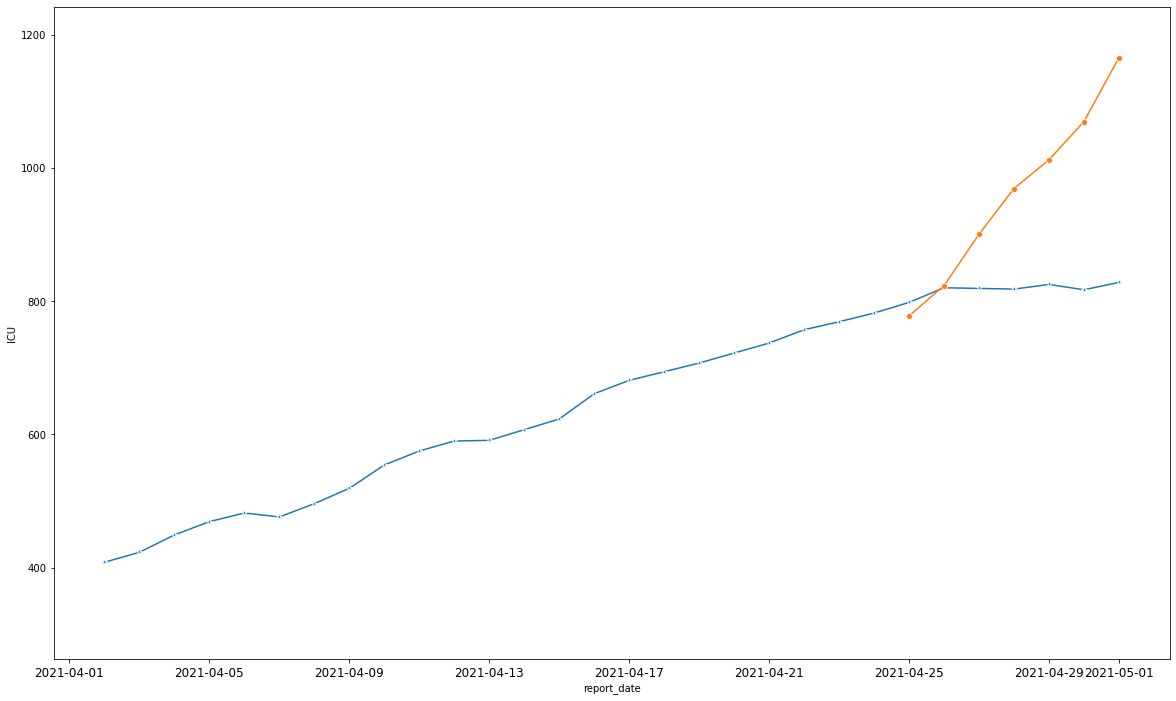

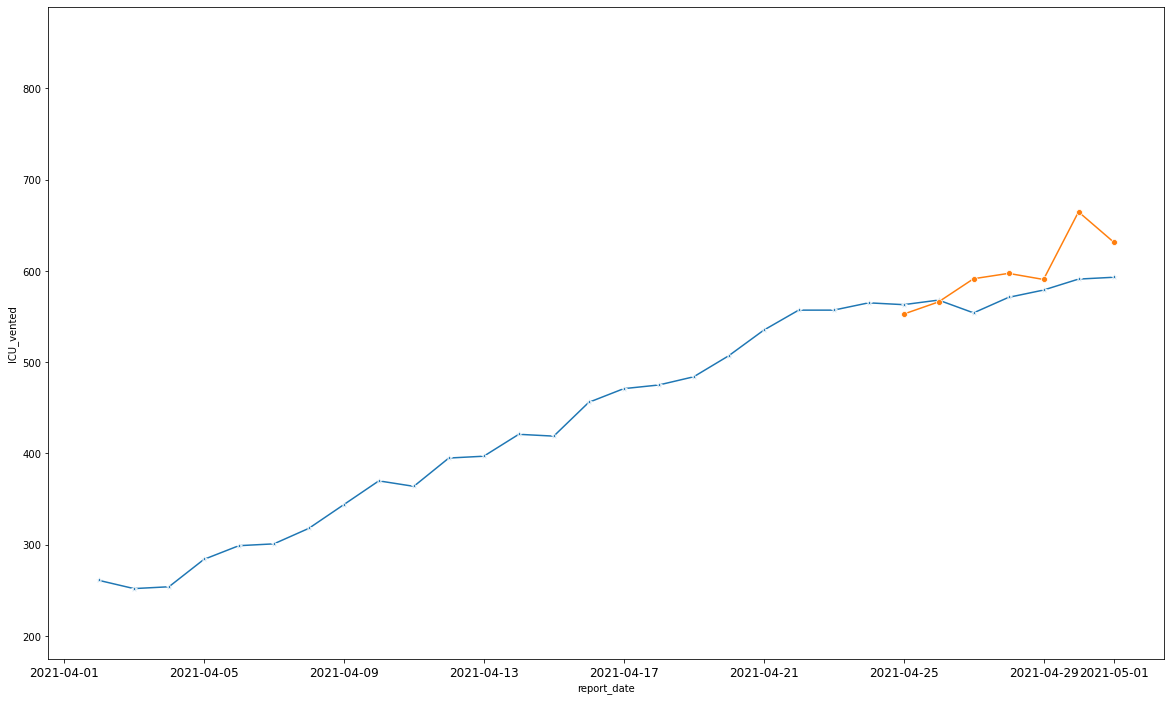

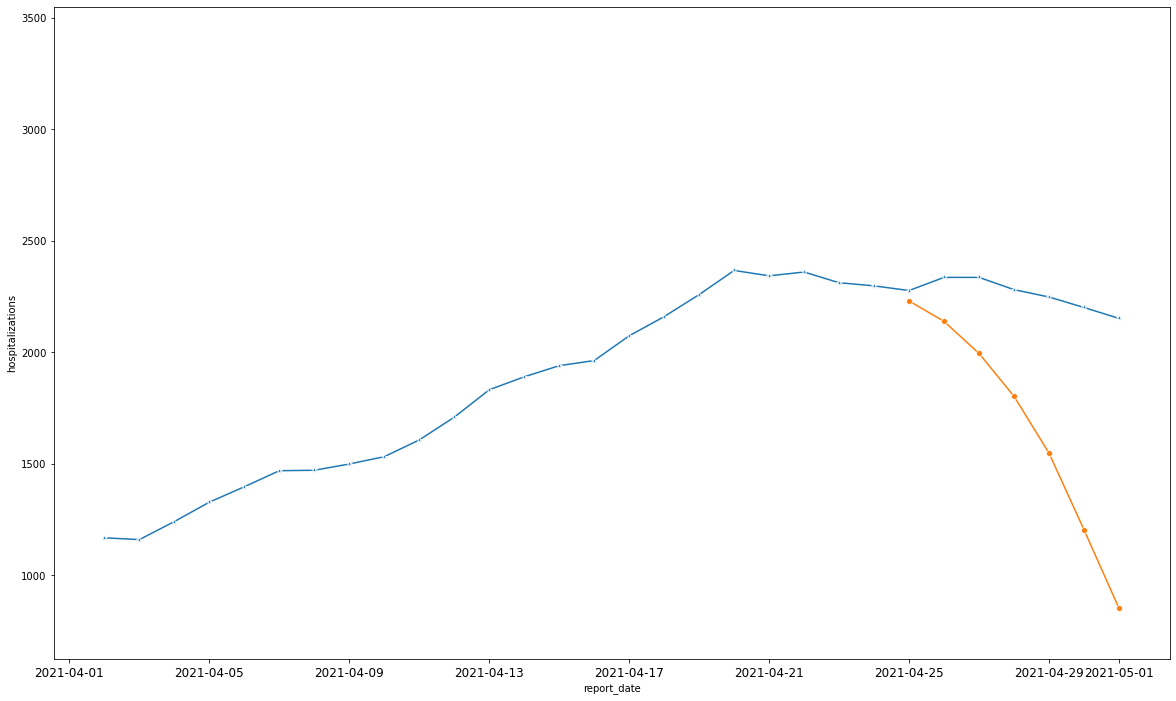

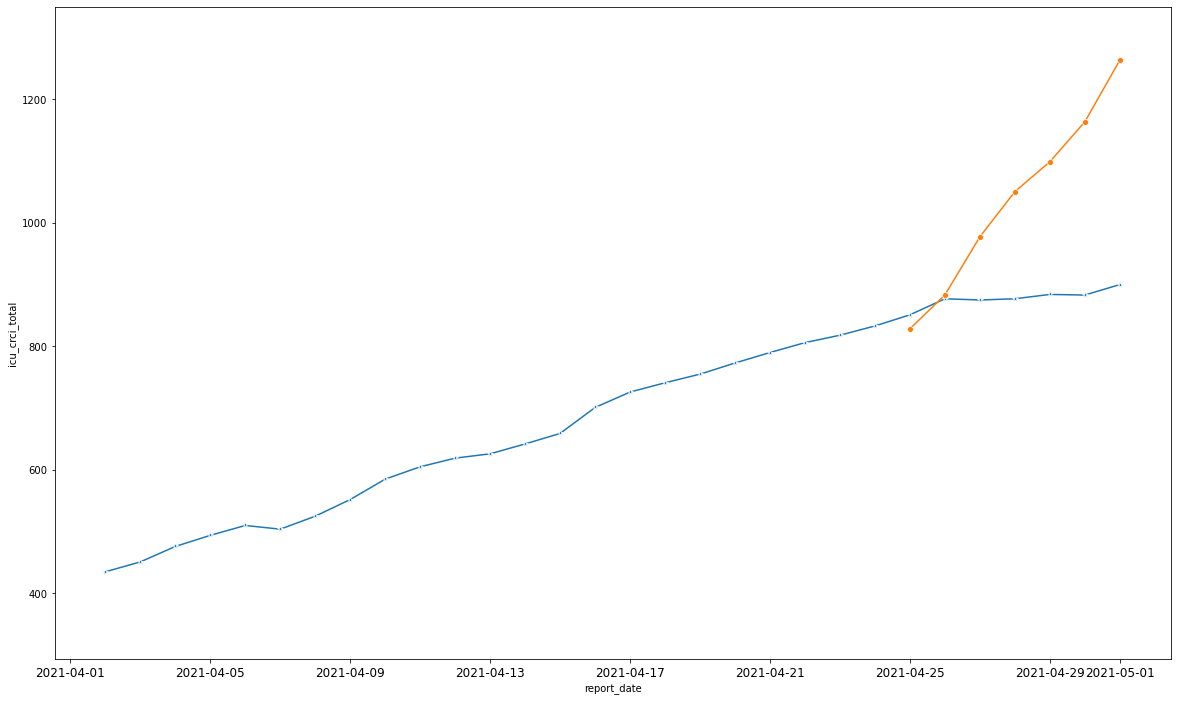

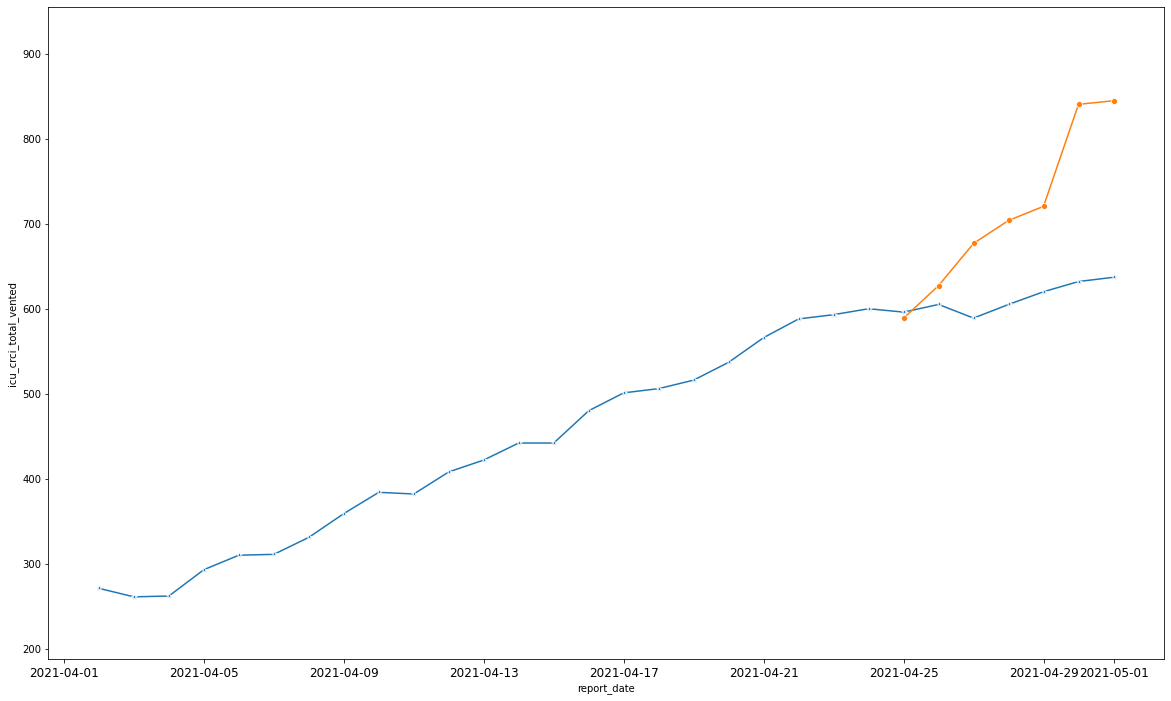

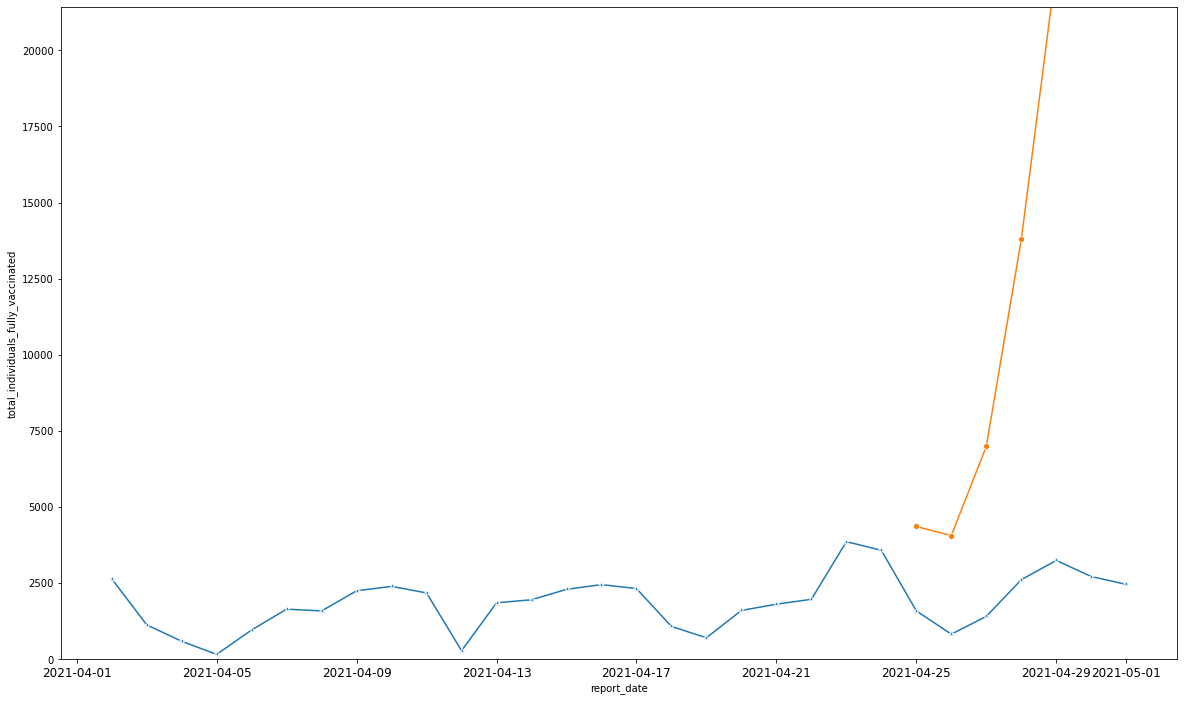

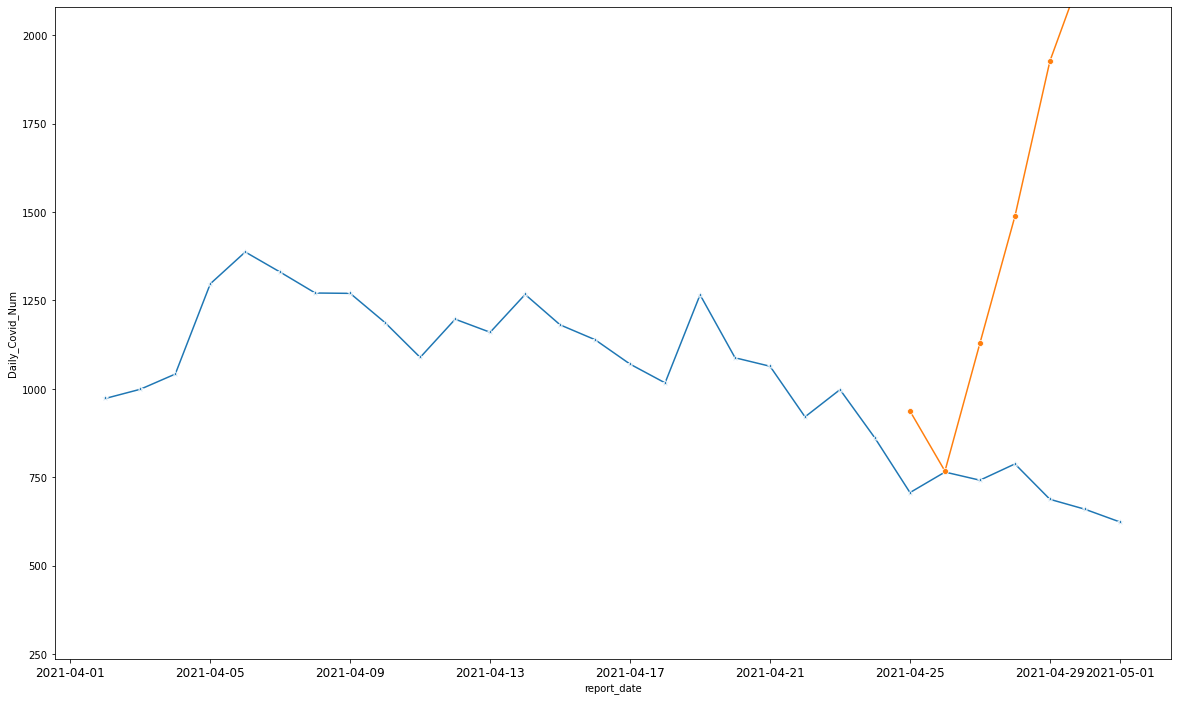

In [145]:
for i in range(0,len(df1.columns)):
    plt.figure(figsize=(20,12))
    sns.lineplot(x=df1.index[-30:],y=df1.iloc[-30:,i],marker='*')
    sns.lineplot(x=df1_test.index,y=df1_forecasted.iloc[:,i],marker='o')
    plt.xticks(fontsize=12)
    plt.ylim(np.min(df1.iloc[:,i]),np.max(df1.iloc[:,i])*1.5)
    plt.show()